In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
torch.cuda.set_sync_debug_mode(1)

device = torch.device("cuda:0")

/hdd/honkamj2/.conda_envs/composable-mapping/lib/python3.8/site-packages/torch/cuda/__init__.py:974: UserWarning: Synchronization debug mode is a prototype feature and does not yet detect all synchronizing operations (Triggered internally at /opt/conda/conda-bld/pytorch_1724789115405/work/torch/csrc/cuda/Module.cpp:862.)
  torch._C._cuda_set_sync_debug_mode(debug_mode)


In [9]:
random_matrix_1 = torch.randn(10000, 10000, device=device)
random_matrix_2 = torch.randn(10000, 10000, device=device)

# measure time
import time
event_1 = torch.cuda.Event(enable_timing=True)
event_2 = torch.cuda.Event(enable_timing=True)
start = time.time()
event_1.record()
for _ in range(50):
    a = torch.zeros(20, 20, device=device) * 20
    random_matrix = torch.mm(random_matrix_1, random_matrix_2)
event_2.record()
print((time.time() - start) * 1000)
torch.cuda.synchronize()
print(event_1.elapsed_time(event_2))

3.843545913696289
4593.5986328125


In [7]:
from composable_mapping.coordinate_system import CoordinateSystem
from composable_mapping.grid_mapping import create_deformation, create_volume
from composable_mapping.mappable_tensor.mappable_tensor import PlainTensor


random_ddf_1 = torch.randn(1, 2, 64, 64, device=device)
random_ddf_2 = torch.randn(1, 2, 64, 64, device=device)
coordinate_system = CoordinateSystem.centered((64, 64), (1, 1), device=device)
deformation_1 = create_deformation(PlainTensor(random_ddf_1), coordinate_system=coordinate_system)
deformation_2 = create_deformation(PlainTensor(random_ddf_2), coordinate_system=coordinate_system)
output = (deformation_1 @ deformation_2)(coordinate_system.grid()).generate_values()

In [8]:
print(output)

tensor([[[[-6.3052e+01, -6.3961e+01, -6.5504e+01,  ..., -6.6021e+01,
           -6.1800e+01, -6.3410e+01],
          [-5.9148e+01, -6.1858e+01, -6.2302e+01,  ..., -6.0895e+01,
           -6.1191e+01, -6.0665e+01],
          [-6.1856e+01, -5.9347e+01, -5.9070e+01,  ..., -6.1736e+01,
           -5.9258e+01, -6.1944e+01],
          ...,
          [-2.4628e+00, -1.7561e+00, -2.6998e+00,  ..., -2.7960e+00,
           -2.7782e+00, -2.8264e+00],
          [ 1.5543e+00, -7.3676e-01,  8.4394e-02,  ..., -1.1518e+00,
            1.0420e+00, -1.9839e+00],
          [ 3.7780e-01, -3.7806e-01, -2.7376e+00,  ..., -1.3822e+00,
            1.7859e+00,  1.1774e+00]],

         [[-6.2559e+01, -6.1931e+01, -6.2584e+01,  ..., -4.1576e+00,
           -9.3716e-02,  3.5745e-01],
          [-6.2856e+01, -6.1004e+01, -6.0055e+01,  ...,  7.7511e-01,
           -9.1687e-01, -1.4116e+00],
          [-6.2508e+01, -6.1952e+01, -6.1153e+01,  ..., -4.1769e+00,
           -1.4354e+00, -3.0548e-02],
          ...,
     

/hdd/honkamj2/.conda_envs/composable-mapping/lib/python3.8/site-packages/torch/_tensor_str.py:138: UserWarning: called a synchronizing CUDA operation (Triggered internally at /opt/conda/conda-bld/pytorch_1724789115405/work/c10/cuda/CUDAFunctions.cpp:150.)
  nonzero_finite_vals = torch.masked_select(
/hdd/honkamj2/.conda_envs/composable-mapping/lib/python3.8/site-packages/torch/_tensor_str.py:152: UserWarning: called a synchronizing CUDA operation (Triggered internally at /opt/conda/conda-bld/pytorch_1724789115405/work/c10/cuda/CUDAFunctions.cpp:150.)
  if value != torch.ceil(value):
/hdd/honkamj2/.conda_envs/composable-mapping/lib/python3.8/site-packages/torch/_tensor_str.py:173: UserWarning: called a synchronizing CUDA operation (Triggered internally at /opt/conda/conda-bld/pytorch_1724789115405/work/c10/cuda/CUDAFunctions.cpp:150.)
  if (
/hdd/honkamj2/.conda_envs/composable-mapping/lib/python3.8/site-packages/torch/_tensor.py:986: UserWarning: called a synchronizing CUDA operation (

tensor([[[[ 0.2415, -0.4798,  0.1673,  ..., -0.1671,  0.2746, -0.3734],
          [-0.4595, -0.4725,  0.2633,  ...,  0.5351, -0.1222, -0.2021],
          [ 0.5020, -0.1688,  0.0686,  ...,  0.1848,  0.2481, -0.4976],
          ...,
          [ 0.5924,  0.1743, -0.0357,  ...,  0.1505, -0.1528, -0.2440],
          [ 0.2374,  0.3371, -0.0075,  ..., -0.1639, -0.5289,  0.3440],
          [ 0.3817,  0.3138, -0.5249,  ...,  0.1017,  0.1989, -0.1345]],

         [[ 0.2783, -0.0875, -0.2612,  ..., -0.0093, -0.2334, -0.1960],
          [-0.0684,  0.0966,  0.0550,  ..., -0.1483,  0.2659, -0.4789],
          [-0.0384,  0.4589,  0.2909,  ..., -0.1480, -0.1377,  0.0901],
          ...,
          [ 0.2167, -0.3342, -0.1107,  ..., -0.4272, -0.5506, -0.2880],
          [ 0.3656,  0.2506, -0.2369,  ...,  0.2443, -0.5409,  0.1283],
          [ 0.1918, -0.1542, -0.0651,  ...,  0.2024,  0.4752, -0.0034]]]])
None
tensor([[[[200., 200., 200.,  ..., 189., 190., 190.],
          [200., 199., 199.,  ..., 190., 1

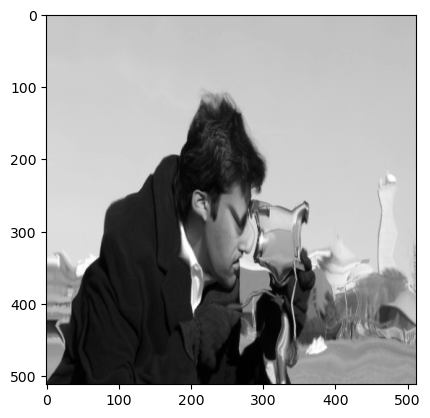

In [ ]:
from composable_mapping.dense_deformation import generate_voxel_coordinate_grid, integrate_svf, interpolate
from composable_mapping.grid_mapping import create_deformation, create_volume
from composable_mapping.mapping_factory import SamplableMappingFactory, create_composable_affine
from composable_mapping.mappable_tensor import PlainTensor
from composable_mapping.coordinate_system import create_centered_normalized, create_voxel
coordinate_system = create_voxel((512, 512))
samplable_mapping_factory = SamplableMappingFactory(coordinate_system=coordinate_system)
downsampled_mapping_factory = SamplableMappingFactory(coordinate_system=coordinate_system.reformat(downsampling_factor=16))

random_ddf = integrate_svf(torch.randn(1, 2, 32, 32) * 0.4)
deformation = downsampled_mapping_factory.create_deformation(random_ddf)
affine = samplable_mapping_factory.create_affine(torch.tensor([[0.5, 0.0, 0.0], [0.0, 0.9, -10.0],[0.0, 0.0, 1.0]]))
image = samplable_mapping_factory.create_volume(PlainTensor(camera))
transformed_image = (image @ deformation @ affine).sample_to(image).generate_values()
plt.imshow(transformed_image[0, 0], cmap="gray")
plt.show()
#plt.imshow(transformed_image_2[0, 0], cmap="gray")

In [ ]:
from deformation_inversion_layer.interpolator import LinearInterpolator
from torch import Tensor

from composable_mapping.dense_deformation import interpolate

class CustomInterpolator(LinearInterpolator):
    def __init__(self, padding_mode: str = "border") -> None:
        super().__init__(padding_mode)
        self.count = 0

    def __call__(self, volume: Tensor, coordinates: Tensor) -> Tensor:
        self.count += 1
        return interpolate(
            volume=volume,
            grid=coordinates,
            mode="bilinear",
            padding_mode=self._padding_mode,
        )
    

In [ ]:
import torch.nn.functional
from composable_mapping.affine_transformation import HostAffineTransformation
from composable_mapping.grid_mapping import (
    InterpolationArgs,
    create_deformation_from_voxel_data,
    create_volume,
)
from composable_mapping.mapping_factory import SamplableMappingFactory
from composable_mapping.masked_tensor import MaskedTensor
from composable_mapping.coordinate_system import create_centered_normalized, create_voxel

random_image = torch.randn(1, 1, 512, 512, 512, device=torch.device("cuda:0"))
random_ddf = torch.randn(1, 3, 512, 512, 512, device=torch.device("cuda:0"))

normalized_coordinate_system = create_centered_normalized(
    shape=(512, 512, 512), device=torch.device("cuda:0")
)
voxel_coordinate_system = create_voxel(
    shape=(512, 512, 512), device=torch.device("cuda:0")
)

mapping_factory = SamplableMappingFactory(
    normalized_coordinate_system,
    interpolation_args=InterpolationArgs(mask_outside_fov=True),
)
image = mapping_factory.create_volume(random_image)
deformation = mapping_factory.create_deformation(random_ddf)

# create example affine matrix which is not identity
matrix = torch.tensor(
    [
        [1.1, 0, 0, 0],
        [0, 1.1, 0, 0],
        [0, 0, 1.1, 0],
        [0, 0, 0, 1],
    ]
)
affine = HostAffineTransformation(transformation_matrix_on_host=matrix, device=torch.device("cuda:0")).pin_memory_if_target_not_cpu()
data = torch.randn(1, 3, 128, 128, 128, device=torch.device("cuda:0"))
random_tensor = torch.tensor([1.5, 1.5, 1.5], device=torch.device("cuda:0"))

ImportError: cannot import name 'create_deformation_from_voxel_data' from 'composable_mapping.grid_mapping' (/hdd/honkamj2/workspace/github/composable-mapping/src/composable_mapping/grid_mapping.py)

In [ ]:
import torch.nn.functional
from composable_mapping.grid_mapping import (
    InterpolationArgs,
    create_deformation_from_voxel_data,
    create_volume,
)
from composable_mapping.mapping_factory import SamplableMappingFactory
from composable_mapping.masked_tensor import MaskedTensor
from composable_mapping.coordinate_system import create_centered_normalized, create_voxel

random_image = torch.randn(1, 1, 128, 128, 128, device=torch.device("cuda:0"))
random_ddf = torch.randn(1, 3, 128, 128, 128, device=torch.device("cuda:0"))

normalized_coordinate_system = create_centered_normalized(
    shape=(128, 128, 128), device=torch.device("cuda:0")
)
voxel_coordinate_system = create_voxel(
    shape=(128, 128, 128), device=torch.device("cuda:0")
)

mapping_factory = SamplableMappingFactory(
    normalized_coordinate_system,
    interpolation_args=InterpolationArgs(mask_outside_fov=True),
)
image = mapping_factory.create_volume(random_image)
deformation = mapping_factory.create_deformation(random_ddf)
#deformation = deformation.resample()

normalized_grid = deformation.sample().generate_values()
voxel_grid = deformation.sample_as_displacement_field().generate_values() + voxel_coordinate_system.grid().generate_values()

synchronize()
start = time.time()
event_1.record()
for _ in range(40):
    # volume.compose(deformation)(coordinate_system.grid())
    # composition(voxel_coordinate_system.grid())
    # interpolator(random_image, grid)
    # volume(MaskedTensor(random_ddf))
    # jou = torch.tensor(5.0).pin_memory().to(torch.device("cuda:0"), non_blocking=True)
    # jou = torch.ones(1, device=torch.device("cuda:0")) * 5.0
    deformation.estimate_spatial_derivatives(0)
    """torch.nn.functional.grid_sample(
        random_image.permute((0, 1, 4, 3, 2)),
        normalized_grid.moveaxis(1, -1),
        align_corners=False,
        mode="bilinear",
        padding_mode="border",
    )"""
event_2.record()
end = time.time()
print(f"Time: {end - start}")

synchronize()
print(f"CUDA Time: {event_1.elapsed_time(event_2) / 1000}")